# CIFAR Classification

### Objectives

- Implement a CNN for a 10-class classification problem
- Enhance the CNN performance with data augmentation techniques
- Experiment by switching to GPU for image processing (Google Colab)

<hr>

This exercise uses the CIFAR-10 dataset, which contains images of 10 different classes 

<img src="https://people.minesparis.psl.eu/fabien.moutarde/ES_MachineLearning/mini-projets/cifar10_notebook_fichiers/cifar_10.png">


## 1. Data

Load and preprocess the data.

In [1]:
from tensorflow.keras.datasets import cifar10
import numpy as np

# Load the CIFAR10 dataet
(images_train, labels_train), (images_test, labels_test) = cifar10.load_data()
labels = ['airplane', 'automobile', 'bird', 'cat', 'deer',
               'dog', 'frog', 'horse', 'ship', 'truck']

# Get the shape of dataset and number of images per class
print(images_train.shape, images_test.shape)
unique, counts = np.unique(labels_train, return_counts=True)
dict(zip(unique, counts))

170500096/170498071 [==============================] - 4s 0us/step
(50000, 32, 32, 3) (10000, 32, 32, 3)


{0: 5000,
 1: 5000,
 2: 5000,
 3: 5000,
 4: 5000,
 5: 5000,
 6: 5000,
 7: 5000,
 8: 5000,
 9: 5000}

In [2]:
# Reduce size to ~10% for faster initial training
reduction_factor = 10

idx_train =  np.random.choice(len(images_train), round(len(images_train)/reduction_factor))
idx_test =  np.random.choice(len(images_test), round(len(images_test)/reduction_factor))

images_train_small = images_train[idx_train]
images_test_small = images_test[idx_test]
labels_train_small = labels_train[idx_train]
labels_test_small = labels_test[idx_test]

# Get number of images per class in reduced size dataset
print(images_train.shape, images_test.shape)
unique, counts = np.unique(labels_train_small, return_counts=True)
dict(zip(unique, counts))

(50000, 32, 32, 3) (10000, 32, 32, 3)


{0: 528,
 1: 535,
 2: 492,
 3: 465,
 4: 478,
 5: 496,
 6: 516,
 7: 508,
 8: 487,
 9: 495}

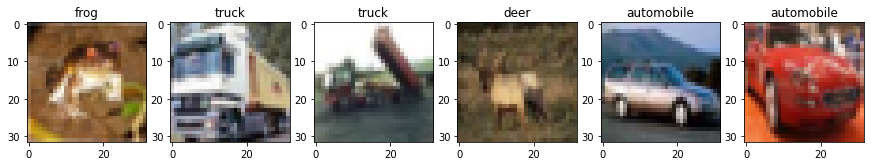

In [3]:
# Plot example images
import matplotlib.pyplot as plt

plt.figure(figsize=(15,5))
for image in range(6):
    plt.subplot(1, 6, image+1)
    img = images_train[image]
    label = labels_train[image][0]
    plt.imshow(img)
    plt.title(labels[label])

In [4]:
## Preprocessing

# Normalise data (bewteen 0 to 1)
X_train = images_train / 255.
X_train_small = images_train_small / 255.
X_test = images_test / 255.
X_test_small = images_test_small / 255.

# One-hot-encode labels
from tensorflow.keras.utils import to_categorical
y_train = to_categorical(labels_train, 10)
y_train_small = to_categorical(labels_train_small, 10)
y_test = to_categorical(labels_test, 10)
y_test_small = to_categorical(labels_test_small, 10)

In [5]:
from tensorflow.keras import Sequential, layers
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dropout, Dense

# Define a method to initialise the model
def initialise_model():
    model = Sequential()
    model.add(Conv2D(32, (3, 3), activation='relu', padding='same', input_shape=(32, 32, 3)))
    model.add(MaxPooling2D((2, 2)))  # Filter to get max presence of relevant features
    model.add(Dropout(0.2))  # Dropout to avoid overfitting
    model.add(Conv2D(64, (3, 3), activation='relu', padding='same'))
    model.add(MaxPooling2D((2, 2)))
    model.add(Dropout(0.2))
    model.add(Conv2D(128, (2, 2), activation='relu', padding='same'))
    model.add(Dropout(0.3))
    model.add(MaxPooling2D((2, 2)))
    
    model.add(Flatten())
    model.add(Dense(100, activation='relu'))
    model.add(Dropout(0.4))
    model.add(Dense(10, activation='softmax'))
    
    return model

In [6]:
model = initialise_model()
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 32, 32, 32)        896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 16, 16, 32)        0         
_________________________________________________________________
dropout (Dropout)            (None, 16, 16, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 16, 16, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 8, 8, 64)          0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 8, 8, 64)          0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 8, 8, 128)         3

In [7]:
from tensorflow.keras import optimizers

# Define method to compile model, using accuracy as final metric
def compile_model(model):
    model.compile(loss='categorical_crossentropy',
                  optimizer='adam',
                  metrics=['accuracy'])
    return model

In [8]:
from tensorflow.keras.callbacks import EarlyStopping

# Initialise and compile model
model_small = initialise_model()
model_small = compile_model(model)

# Train model of reduced dataset and use early stopping to limit run time
es = EarlyStopping(patience=5, verbose=2)

history_small = model_small.fit(X_train_small, y_train_small, 
                    validation_split=0.3,
                    callbacks=[es], 
                    epochs=100, 
                    batch_size=64)

Epoch 1/100
55/55 [==============================] - 32s 15ms/step - loss: 2.2811 - accuracy: 0.1291 - val_loss: 2.2063 - val_accuracy: 0.1987
Epoch 2/100
55/55 [==============================] - 0s 6ms/step - loss: 2.1216 - accuracy: 0.2134 - val_loss: 2.0315 - val_accuracy: 0.2840
Epoch 3/100
55/55 [==============================] - 0s 7ms/step - loss: 1.9178 - accuracy: 0.2886 - val_loss: 1.7734 - val_accuracy: 0.3820
Epoch 4/100
55/55 [==============================] - 0s 6ms/step - loss: 1.7933 - accuracy: 0.3400 - val_loss: 1.7237 - val_accuracy: 0.3760
Epoch 5/100
55/55 [==============================] - 0s 7ms/step - loss: 1.7601 - accuracy: 0.3443 - val_loss: 1.7402 - val_accuracy: 0.3707
Epoch 6/100
55/55 [==============================] - 0s 7ms/step - loss: 1.6682 - accuracy: 0.3780 - val_loss: 1.6128 - val_accuracy: 0.4240
Epoch 7/100
55/55 [==============================] - 0s 7ms/step - loss: 1.6021 - accuracy: 0.4120 - val_loss: 1.5583 - val_accuracy: 0.4507
Epoch 8/100

In [9]:
# Define method to plot training loss and accuracy
def plot_history(history, title='', axs=None, exp_name=""):
    if axs is not None:
        ax1, ax2 = axs
    else:
        f, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 4))
    
    if len(exp_name) > 0 and exp_name[0] != '_':
        exp_name = '_' + exp_name
    ax1.plot(history.history['loss'], label='train' + exp_name)
    ax1.plot(history.history['val_loss'], label='val' + exp_name)
    ax1.set_ylim(0., 2.2)
    ax1.set_title('loss')
    ax1.legend()

    ax2.plot(history.history['accuracy'], label='train accuracy'  + exp_name)
    ax2.plot(history.history['val_accuracy'], label='val accuracy'  + exp_name)
    ax2.set_ylim(0.25, 1.)
    ax2.set_title('Accuracy')
    ax2.legend()
    return (ax1, ax2)

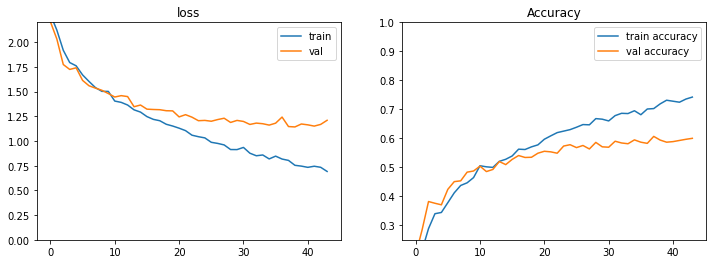

In [10]:
# Plot training history
plot_history(history_small)
plt.show()

In [11]:
# Evaluate model
res = model.evaluate(X_test_small, y_test_small, verbose=0)

print(f'The accuracy is of {res[1]*100:.3f}% compared to a chance level of {1./len(labels)*100} %')

The accuracy is of 56.400% compared to a chance level of 10.0 %


## 3. Increase dataset size

In [12]:
# Initialise and compile model
model = initialise_model()
model = compile_model(model)

es = EarlyStopping(patience=5, verbose=2)

history = model.fit(X_train, y_train,  # Use full dataset
                    validation_split=0.3,
                    callbacks=[es], 
                    epochs=100, 
                    batch_size=64)

Epoch 1/100
547/547 [==============================] - 4s 7ms/step - loss: 1.8396 - accuracy: 0.3193 - val_loss: 1.5571 - val_accuracy: 0.4597
Epoch 2/100
547/547 [==============================] - 3s 6ms/step - loss: 1.4908 - accuracy: 0.4589 - val_loss: 1.3454 - val_accuracy: 0.5408
Epoch 3/100
547/547 [==============================] - 3s 6ms/step - loss: 1.3735 - accuracy: 0.5046 - val_loss: 1.2305 - val_accuracy: 0.5682
Epoch 4/100
547/547 [==============================] - 3s 6ms/step - loss: 1.2939 - accuracy: 0.5341 - val_loss: 1.1494 - val_accuracy: 0.6083
Epoch 5/100
547/547 [==============================] - 3s 6ms/step - loss: 1.2187 - accuracy: 0.5627 - val_loss: 1.1064 - val_accuracy: 0.6253
Epoch 6/100
547/547 [==============================] - 4s 7ms/step - loss: 1.1608 - accuracy: 0.5857 - val_loss: 1.0157 - val_accuracy: 0.6606
Epoch 7/100
547/547 [==============================] - 3s 6ms/step - loss: 1.1242 - accuracy: 0.6002 - val_loss: 1.0343 - val_accuracy: 0.6523

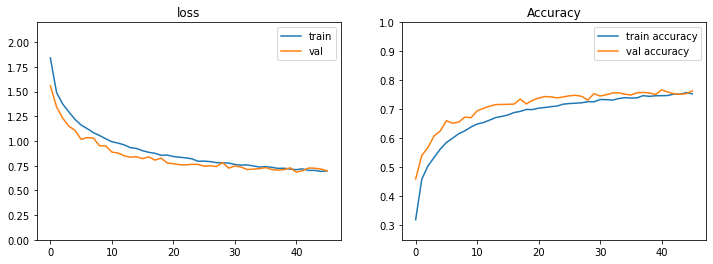

In [13]:
plot_history(history);

In [14]:
res = model.evaluate(X_test, y_test, verbose=0)

print(f'The accuracy is of {res[1]*100:.3f}% compared to a chance level of {1./len(labels)*100} %')

The accuracy is of 76.390% compared to a chance level of 10.0 %


## 4. Data augmentation


In [15]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Generate slightly and randomly cropped images to increase data
datagen = ImageDataGenerator(
    featurewise_center=False,
    featurewise_std_normalization=False,
    rotation_range=10,
    width_shift_range=0.1,
    height_shift_range=0.1,
    horizontal_flip=True,
    zoom_range=(0.8, 1.2),
    ) 

datagen.fit(X_train)
datagen

In [16]:
X_augmented_iterator = datagen.flow(X_train, shuffle=False, batch_size=1)
X_augmented_iterator

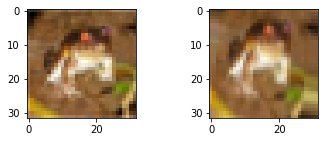

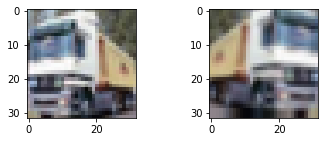

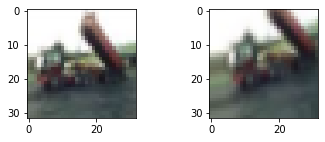

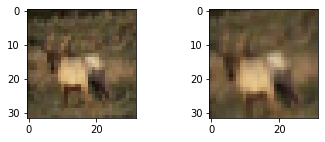

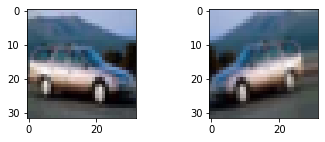

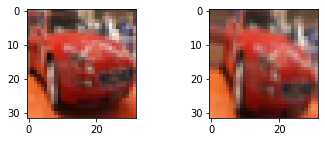

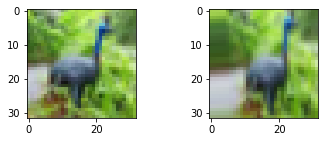

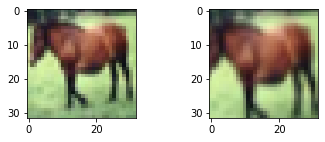

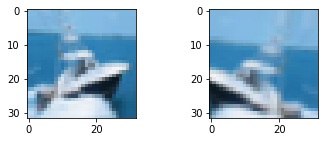

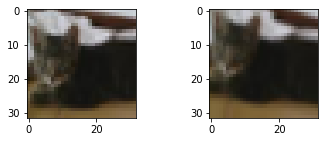

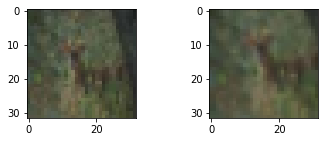

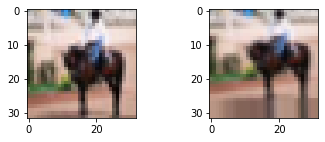

In [17]:
# Visualise newly generated images to confirm still contains relevant parts of the original
for i, (raw_image, augmented_image) in enumerate(zip(X_train, X_augmented_iterator)):
    _, (ax1, ax2) = plt.subplots(1, 2, figsize=(6, 2))
    ax1.imshow(raw_image)
    ax2.imshow(augmented_image[0])
    plt.show()
    
    if i > 10:
        break

In [18]:
# Initialise and compile model
model_aug = initialise_model()
model_aug = compile_model(model_aug)

# Generate data
X_tr = X_train[:40000]
y_tr = y_train[:40000]
X_val = X_train[40000:]
y_val = y_train[40000:]
train_flow = datagen.flow(X_tr, y_tr, batch_size=64)

# Use early stopping
es = EarlyStopping(patience=3)

# Fit model on generated data
history_aug = model_aug.fit(train_flow, 
                        epochs=50, 
                        callbacks=[es], 
                        validation_data=(X_val, y_val))


Epoch 1/50
625/625 [==============================] - 25s 39ms/step - loss: 1.8861 - accuracy: 0.2986 - val_loss: 1.5971 - val_accuracy: 0.4421
Epoch 2/50
625/625 [==============================] - 22s 35ms/step - loss: 1.6182 - accuracy: 0.4101 - val_loss: 1.4249 - val_accuracy: 0.5032
Epoch 3/50
625/625 [==============================] - 22s 36ms/step - loss: 1.5103 - accuracy: 0.4539 - val_loss: 1.3616 - val_accuracy: 0.5309
Epoch 4/50
625/625 [==============================] - 24s 38ms/step - loss: 1.4442 - accuracy: 0.4790 - val_loss: 1.2330 - val_accuracy: 0.5632
Epoch 5/50
625/625 [==============================] - 22s 35ms/step - loss: 1.3906 - accuracy: 0.4997 - val_loss: 1.1859 - val_accuracy: 0.5937
Epoch 6/50
625/625 [==============================] - 23s 37ms/step - loss: 1.3539 - accuracy: 0.5161 - val_loss: 1.1100 - val_accuracy: 0.6165
Epoch 7/50
625/625 [==============================] - 23s 37ms/step - loss: 1.3085 - accuracy: 0.5326 - val_loss: 1.0569 - val_accuracy:

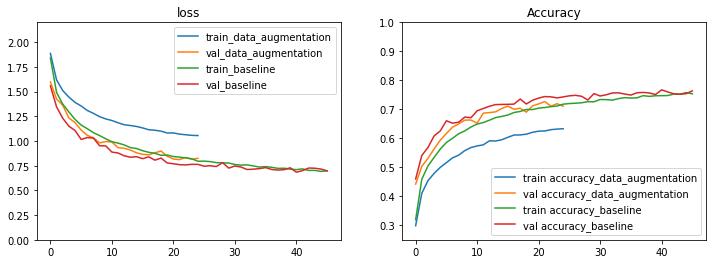

In [19]:
axs = plot_history(history_aug, exp_name='data_augmentation')
plot_history(history ,axs=axs, exp_name='baseline')
plt.show()

In [20]:
res_1 = model.evaluate(X_test, y_test, verbose=0)

res_2 = model_aug.evaluate(X_test, y_test)

print(f'Accuracy without data augmentation {res_1[1]*100:.2f}%')
print(f'Accuracy with data augmentation {res_2[1]*100:.2f}%')

313/313 [==============================] - 1s 3ms/step - loss: 0.8360 - accuracy: 0.7065
Accuracy without data augmentation 76.39%
Accuracy with data augmentation 70.65%
